### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [3]:
file_path='C:/Users/DELL/Desktop/Python case studies/Insurance'

In [4]:
claims= pd.read_csv(file_path+'/claims.csv')

In [5]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
#checking for duplicates in the claims table

claims.duplicated().sum()

0

In [7]:
cust= pd.read_csv(file_path+'/cust_demographics.csv')

In [8]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [9]:
#checking for duplicates in the cust table
cust.duplicated().sum()

0

In [10]:
cust_claims= pd.merge(left=claims, right= cust, how= 'left', left_on='customer_id',right_on='CUST_ID', indicator=True )

In [11]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,both
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,both
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,both


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [12]:
cust_claims.dtypes

claim_id                  int64
customer_id               int64
incident_cause           object
claim_date               object
claim_area               object
police_report            object
claim_type               object
claim_amount             object
total_policy_claims     float64
fraudulent               object
CUST_ID                 float64
gender                   object
DateOfBirth              object
State                    object
Contact                  object
Segment                  object
_merge                 category
dtype: object

In [13]:
# Converting the claim date column in dateset from object to datetime.
cust_claims['claim_date']=pd.to_datetime(cust_claims.claim_date)

In [14]:
# Converting the DateOfBirth column in dateset from object to datetime.
cust_claims['DateOfBirth']= pd.to_datetime(cust_claims.DateOfBirth)

In [15]:
cust_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
_merge                       category
dtype: object

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [16]:
cust_claims['claim_amount']=cust_claims['claim_amount'].str.replace('$','').astype(float)

C:\Users\DELL\AppData\Local\Temp/ipykernel_32412/1842674099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims['claim_amount']=cust_claims['claim_amount'].str.replace('$','').astype(float)


In [17]:
cust_claims.claim_amount.dtype

dtype('float64')

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [18]:
cust_claims['Alert Flag']= np.where( (cust_claims.claim_type.str.lower().str.contains('injury')) & (cust_claims.police_report!='Yes'),1,0)

In [19]:
cust_claims.head(7)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,Alert Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,both,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,both,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,both,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,both,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,both,0
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,both,1
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,both,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [20]:
cust_claims.sort_values('claim_date', ascending=False, inplace=True)

In [21]:
cust_claims.drop_duplicates(subset=['customer_id'], inplace=True)

In [22]:
cust_claims.customer_id.duplicated().sum()

0

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
cust_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
_merge                       category
Alert Flag                      int32
dtype: object

In [24]:
# Out of the given columns in cust_claims only claim_amount is a continuous variable. Therefore we will do outlier treatment
# for claim_amount before we start with missing value treatment.

p0 = cust_claims.claim_amount.min()
p100 = cust_claims.claim_amount.max()
q2 = cust_claims.claim_amount.quantile( 0.5 )
q1 = cust_claims.claim_amount.quantile( 0.25 )
q3 = cust_claims.claim_amount.quantile( 0.75 )

iqr = q3 - q1

lc = q1 - 1.5 * iqr
uc = q3 + 1.5 * iqr

print( p0, p100, lc, uc )

1000.0 48150.5 -31968.375 58262.625


<AxesSubplot:>

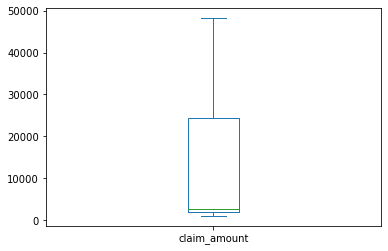

In [25]:
cust_claims.claim_amount.plot(kind = 'box')

In [26]:
cust_claims['total_policy_claims']

282     1.0
350     1.0
1077    1.0
1086    1.0
751     1.0
       ... 
177     1.0
191     1.0
116     1.0
308     3.0
1064    1.0
Name: total_policy_claims, Length: 1093, dtype: float64

In [27]:
# Missing value treatment

cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
_merge                  0
Alert Flag              0
dtype: int64

In [28]:
15/1093*100

1.3723696248856359

In [29]:
cust_claims.dropna(subset=['CUST_ID'], inplace=True)

In [30]:
cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
_merge                  0
Alert Flag              0
dtype: int64

In [31]:
#imputing missing claim amount to mean claim amount

cust_claims.claim_amount.fillna(cust_claims.claim_amount.mean(), inplace=True)

In [147]:
mode_1=cust_claims.total_policy_claims.mode().item()
mode_1

1.0

In [148]:
#imputing missing total policy claims to mode of total policy claims

cust_claims.total_policy_claims.fillna(value=mode_1, inplace=True)

In [149]:
#no there are no missing values 

cust_claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
_merge                 0
Alert Flag             0
Age                    0
Age group              0
dtype: int64

In [36]:
# cust_claims[cust_claims.total_policy_claims.isna()]

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [37]:
# q1_df['Age group']=pd.cut(q1_df.Age,  bins=[0, 1, 12, 19, 60, 100] , labels=['Infant', 'Kid', 'Teenager', 'Grownup', 'Senior Citizen'])

In [38]:
# Calcuting customers age 

cust_claims['Age']= pd.Timestamp.now().year- cust_claims.DateOfBirth.dt.year


In [39]:
#Negative ages are not possible and it's probably a human error that the years have been entered as 2067 insead of 1967

cust_claims.loc[cust_claims.Age<0]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,Alert Flag,Age
282,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,93915431.0,Male,2067-09-08,ME,134-785-1687,Gold,both,1,-44
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,65208809.0,Male,2064-04-22,VA,286-128-6132,Platinum,both,0,-41
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,58451506.0,Male,2068-04-22,FL,673-574-7823,Gold,both,0,-45
977,9261301,53042145,Other causes,2018-10-23,Auto,Unknown,Material only,2553.0,4.0,Yes,53042145.0,Female,2064-10-04,TN,139-746-7128,Platinum,both,0,-41
728,26678377,28590552,Other causes,2018-10-23,Auto,Unknown,Material and injury,25160.0,1.0,No,28590552.0,Female,2064-01-10,TN,189-813-7561,Silver,both,1,-41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,43722644,36395486,Other causes,2017-01-07,Home,No,Material only,3335.0,3.0,Yes,36395486.0,Male,2071-03-06,ND,365-482-4683,Gold,both,0,-48
291,11682102,24579061,Natural causes,2017-01-07,Auto,No,Material only,1770.0,1.0,No,24579061.0,Female,2067-11-24,IN,763-365-2837,Platinum,both,0,-44
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,29323970.0,Male,2071-03-03,NE,783-653-9163,Gold,both,0,-48
577,97666948,97514724,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,97514724.0,Male,2069-06-08,FL,641-684-7986,Platinum,both,1,-46


In [40]:
cust_claims['Age']= np.where(cust_claims.Age<0, (pd.Timestamp.now().year- ((cust_claims.DateOfBirth- pd.offsets.DateOffset(years=100)).dt.year)), cust_claims.Age) 

In [41]:
#Also updating the years in Date of birth column
cust_claims['DateOfBirth']= np.where(cust_claims.Age<0, (cust_claims.DateOfBirth- pd.offsets.DateOffset(years=100)), cust_claims.DateOfBirth) 

In [42]:
cust_claims['Age group']=pd.cut(cust_claims.Age,  bins=[0,18, 30, 60, 100] , labels=['Children', 'Youth', 'Adult', 'Senior'])

In [43]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,Alert Flag,Age,Age group
282,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,93915431.0,Male,2067-09-08,ME,134-785-1687,Gold,both,1,56,Adult
350,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,38011078.0,Female,1976-05-20,NE,271-123-1475,Gold,both,0,47,Adult
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,65208809.0,Male,2064-04-22,VA,286-128-6132,Platinum,both,0,59,Adult
751,25213498,28932340,Driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,1.0,No,28932340.0,Male,1996-01-05,LA,652-265-8231,Gold,both,0,27,Youth
318,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,77510822.0,Female,1986-03-18,AK,436-934-7156,Silver,both,0,37,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [44]:
round(cust_claims.groupby(cust_claims.Segment)['claim_amount'].mean(),2)

Segment
Gold        12846.40
Platinum    12371.65
Silver      12267.86
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [45]:
q9_df= cust_claims[cust_claims.claim_date<pd.to_datetime('10-01-2018')- pd.offsets.DateOffset(days=20)]

In [46]:
q9_df.groupby(q9_df.incident_cause)['claim_amount'].sum()

incident_cause
Crime                 7.219386e+05
Driver error          3.315851e+06
Natural causes        1.312987e+06
Other causes          3.723152e+06
Other driver error    3.277536e+06
Name: claim_amount, dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [47]:
cust_claims[(cust_claims.State.isin(['TX','DE','AK'])) & (cust_claims['Age group']=='Adult') & (cust_claims.incident_cause.str.lower().str.contains('driver'))].shape[0]

27

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [48]:
# cust_claims.groupby(['Segment','gender'])['claim_amount'].sum()

In [49]:
seg_gen= cust_claims.pivot_table(index='Segment',columns='gender', values='claim_amount', aggfunc=sum)

In [50]:
seg_gen

gender,Female,Male
Segment,,
Gold,2.110045e+06,2.655970e+06
Platinum,2.369722e+06,2.096445e+06
Silver,1.897545e+06,2.347134e+06


array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

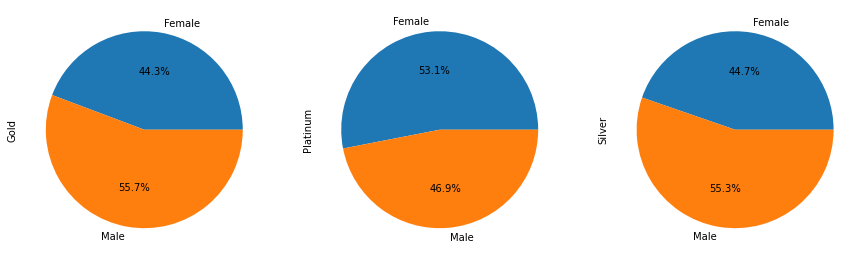

In [51]:
seg_gen.T.plot(kind='pie', subplots=True, figsize=(15,8),legend=False, autopct='%1.1f%%')

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

<AxesSubplot:xlabel='gender', ylabel='number of driver related claims'>

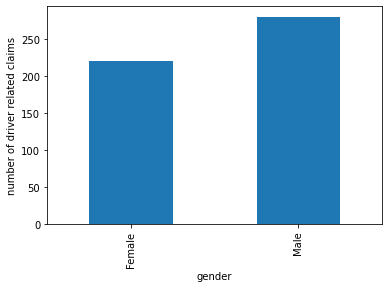

In [52]:
cust_claims[cust_claims.incident_cause.str.lower().str.contains('driver')].groupby('gender')['claim_id'].count().plot(kind='bar',ylabel= 'number of driver related claims')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

<AxesSubplot:xlabel='Age group', ylabel='Number of fradulent claims'>

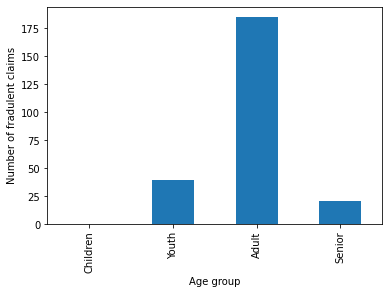

In [53]:
cust_claims[cust_claims.fraudulent.str.lower()=='yes'].groupby('Age group')['claim_id'].count().plot(kind='bar', ylabel= 'Number of fradulent claims')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

<AxesSubplot:xlabel='Month', ylabel='total claim amount'>

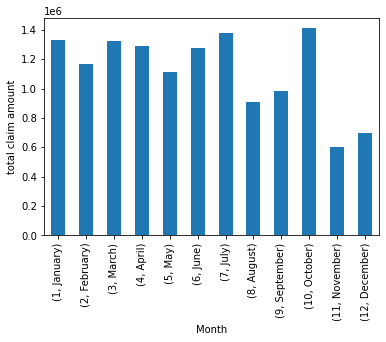

In [54]:
cust_claims.groupby([cust_claims.claim_date.dt.month, cust_claims.claim_date.dt.month_name()])['claim_amount'].sum().plot(kind='bar',xlabel='Month', ylabel='total claim amount')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 

In [140]:
fraud_age_gender_amt= pd.DataFrame(cust_claims[cust_claims.fraudulent.str.lower()=='yes'].groupby(["gender","Age group"])[["claim_amount"]].mean().add_prefix("Fraud_"))
fraud_age_gender_amt

Fraud_claim_amount
gender Age group                    
Female Children                  NaN
       Youth             9220.495534
       Adult            12630.113839
       Senior            3779.076923
Male   Children                  NaN
       Youth             7799.623697
       Adult            16049.184674
       Senior           16879.125000

In [144]:
authentic_age_gender_amt=pd.DataFrame(cust_claims[cust_claims.fraudulent.str.lower()!='yes'].groupby(["gender","Age group"])[["claim_amount"]].mean().add_prefix("Authentic_"))
authentic_age_gender_amt

Authentic_claim_amount
gender Age group                        
Female Children                      NaN
       Youth                13174.551022
       Adult                11982.841119
       Senior               14965.431639
Male   Children                      NaN
       Youth                12089.549538
       Adult                12375.035967
       Senior               12607.781770

In [145]:
fraud_authentic_amt= round(pd.merge(fraud_age_gender_amt,authentic_age_gender_amt, on=["gender","Age group"]),2)
fraud_authentic_amt

Fraud_claim_amount  Authentic_claim_amount
gender Age group                                            
Female Children                  NaN                     NaN
       Youth                 9220.50                13174.55
       Adult                12630.11                11982.84
       Senior                3779.08                14965.43
Male   Children                  NaN                     NaN
       Youth                 7799.62                12089.55
       Adult                16049.18                12375.04
       Senior               16879.12                12607.78

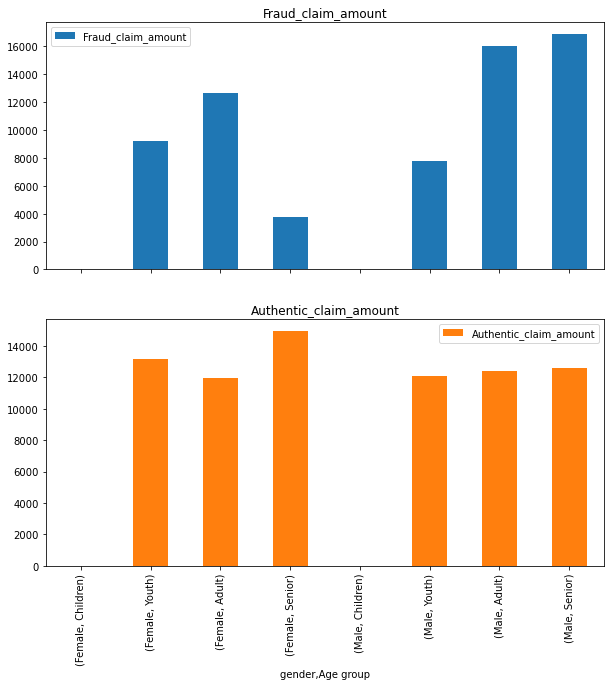

In [146]:
fraud_authentic_amt.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [60]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?

In [61]:
cust_claims.groupby('gender')['claim_amount'].sum()

gender
Female    6.377312e+06
Male      7.099550e+06
Name: claim_amount, dtype: float64

In [62]:
amount = 'claim_amount'

male_spend = cust_claims.loc[ cust_claims.gender == 'Male', amount ]
female_spend = cust_claims.loc[ cust_claims.gender == 'Female', amount ]

print( 'mean of male spend: ', round(male_spend.mean(),2), '| mean of female spend: ', round(female_spend.mean(),2) )

mean of male spend:  12884.85 | mean of female spend:  12101.16


#### Using t test to check the relation 

In [63]:
stats.ttest_ind( male_spend, female_spend )

Ttest_indResult(statistic=0.9625093446632118, pvalue=0.33601006135365463)

In [118]:
# p value of the test

p_16 = stats.ttest_ind( male_spend, female_spend ).pvalue
p_16

0.33601006135365463

In [119]:
# Checking if p value is greater than or less than 0.05.

if(p_16<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### 17. Is there any relationship between age category and segment?

#### Using Chi Square test to check the relationship because age category and segment because these are two categorical variables. 

In [66]:
obs_freq = pd.crosstab( cust_claims['Age group'], cust_claims['Segment'])

In [67]:
obs_freq

Segment,Gold,Platinum,Silver
Age group,,,
Youth,71,69,68
Adult,272,266,257
Senior,28,26,21


In [68]:
stats.chi2_contingency(obs_freq)

(0.6654696397990999,
 0.9555179463691874,
 4,
 array([[ 71.58441558,  69.65491651,  66.7606679 ],
        [273.6038961 , 266.22912801, 255.16697588],
        [ 25.81168831,  25.11595547,  24.07235622]]))

In [120]:
p_17= stats.chi2_contingency(obs_freq)[1]
p_17

0.9555179463691874

In [121]:
# Checking if p value is greater than or less than 0.05.

if(p_17<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [71]:
s1= cust_claims.loc[cust_claims.claim_date.dt.year==2018, 'claim_amount']

In [72]:
s1.mean()

12743.43753167584

In [73]:
stats.ttest_1samp(s1,10000)

Ttest_1sampResult(statistic=4.477343563243787, pvalue=9.43584422198333e-06)

In [122]:
p_18= stats.ttest_1samp(s1,10000).pvalue
p_18

9.43584422198333e-06

In [123]:
# Checking if p value is greater than or less than 0.05.

if(p_18<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### 19. Is there any difference between age groups and insurance claims?

In [74]:
cust_claims['Age group'].value_counts()

Adult       795
Youth       208
Senior       75
Children      0
Name: Age group, dtype: int64

In [75]:
s1_19=cust_claims.loc[cust_claims['Age group']=='Adult', 'total_policy_claims']
s2_19=cust_claims.loc[cust_claims['Age group']=='Youth', 'total_policy_claims']
s3_19=cust_claims.loc[cust_claims['Age group']=='Senior', 'total_policy_claims']
s4_19=cust_claims.loc[cust_claims['Age group']=='Children', 'total_policy_claims']

In [76]:
cust_claims.shape

(1078, 20)

In [77]:
print( 'mean s1_19:', s1_19.mean(), '| mean s2_19:', s2_19.mean(), '| mean s3_19:', s3_19.mean(), '| mean s4_19:', s4_19.mean())

mean s1_19: 1.568553459119497 | mean s2_19: 1.6538461538461537 | mean s3_19: 1.5466666666666666 | mean s4_19: nan


In [78]:
# Performing f-test or ANOVA 

stats.f_oneway(s1_19,s2_19,s3_19)

F_onewayResult(statistic=0.4986287189492082, pvalue=0.6075033571498096)

In [124]:
# p value of the f test 

p_19=stats.f_oneway(s1_19,s2_19,s3_19).pvalue
p_19

0.6075033571498096

In [126]:
# Checking if p value is greater than or less than 0.05.

if(p_19<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### 20. Is there any relationship between total number of policy claims and the claimed amount?

####  Creating m saples of different number of total policy claims to use ANOVA to test the claim

In [105]:
list1=[]
for i in cust_claims.total_policy_claims.unique():
    list1.append(cust_claims.loc[cust_claims['total_policy_claims']==i, 'claim_amount' ])

In [108]:
stats.f_oneway(list1[0],list1[1],list1[2],list1[3],list1[4],list1[5],list1[6],list1[7])

F_onewayResult(statistic=0.8380476645185537, pvalue=0.5557205168055845)

In [111]:
p= stats.f_oneway(list1[0],list1[1],list1[2],list1[3],list1[4],list1[5],list1[6],list1[7]).pvalue
p

0.5557205168055845

In [112]:
# Checking if p value is greater than or less than 0.05.

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


#### Treating the number of policy claims as a ordinal categorical variable, using spearsman rank to test the relationship between claimed amount and number of policy claims

In [113]:
stats.spearmanr(cust_claims.total_policy_claims,cust_claims.claim_amount)

SpearmanrResult(correlation=0.0024438656269395224, pvalue=0.9361209394901033)

In [114]:
p= stats.spearmanr(cust_claims.total_policy_claims,cust_claims.claim_amount).pvalue
p

0.9361209394901033

In [116]:
# Checking if p value is greater than or less than 0.05.

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis
